<h1 align=center>Happy Customers of ACME</h1>

## Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectPercentile

from sklearn.model_selection import (cross_val_score, train_test_split)
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score)

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# import warnings filter
from warnings import simplefilter, filterwarnings
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("error", message=".*check_inverse*.", category=UserWarning, append=False)

## Step 2: Load data
### Column Details ###
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers <br>
X1 = my order was delivered on time <br>
X2 = contents of my order was as I expected <br>
X3 = I ordered everything I wanted to order <br>
X4 = I paid a good price for my order <br>
X5 = I am satisfied with my courier <br>
X6 = the app makes ordering easy for me <br>

In [3]:
colNames = ['isHappy', 'OnTimeDelivery_Rating','ContentsAsExpected_Rating','OrderedEverything_Rating',
           'GoodPrice_Rating','CourierSatisfaction_Rating','EasyApp_Rating']
custData = pd.read_csv('ACME-HappinessSurvey2020.csv', names=colNames, header =0)
custData.head()

,isHappy,OnTimeDelivery_Rating,ContentsAsExpected_Rating,OrderedEverything_Rating,GoodPrice_Rating,CourierSatisfaction_Rating,EasyApp_Rating
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
custData.head()

,isHappy,OnTimeDelivery_Rating,ContentsAsExpected_Rating,OrderedEverything_Rating,GoodPrice_Rating,CourierSatisfaction_Rating,EasyApp_Rating
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   isHappy                     126 non-null    int64
 1   OnTimeDelivery_Rating       126 non-null    int64
 2   ContentsAsExpected_Rating   126 non-null    int64
 3   OrderedEverything_Rating    126 non-null    int64
 4   GoodPrice_Rating            126 non-null    int64
 5   CourierSatisfaction_Rating  126 non-null    int64
 6   EasyApp_Rating              126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [6]:
custData.describe()

,isHappy,OnTimeDelivery_Rating,ContentsAsExpected_Rating,OrderedEverything_Rating,GoodPrice_Rating,CourierSatisfaction_Rating,EasyApp_Rating
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Based on above details, the independent variables does not have any null values or zero value. Hence, it is not required impute any missing data or any data cleaning.

## Step 3: Data Exploration

### A] As per below graph, the data is not highly imbalanced.

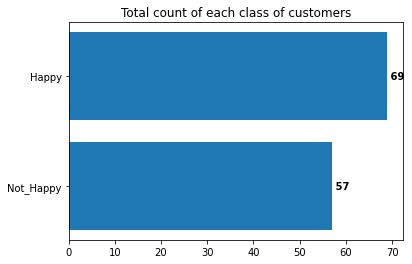

In [7]:
fig, ax = plt.subplots()
s = custData.groupby(['isHappy']).size().sort_values(ascending=True)
ylabel = ('Not_Happy','Happy')
y_pos = np.arange(len(ylabel))
ax.barh(y_pos, s, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(ylabel)
[ax.text(v, i, " "+str(v), va='center', fontweight='bold') for i, v in enumerate(s)];
_ = plt.title('Total count of each class of customers')
plt.show()

### B] Below graph shows variation of data for each independent variables with respect to dependent variable. It shows how happy and not happy customers have provided ratings in each category.

### In most of the category, happy customers have rated higher. But for category 'ContentsAsExpected_Rating', many happy customers have rated low as compared to unhappy customers.

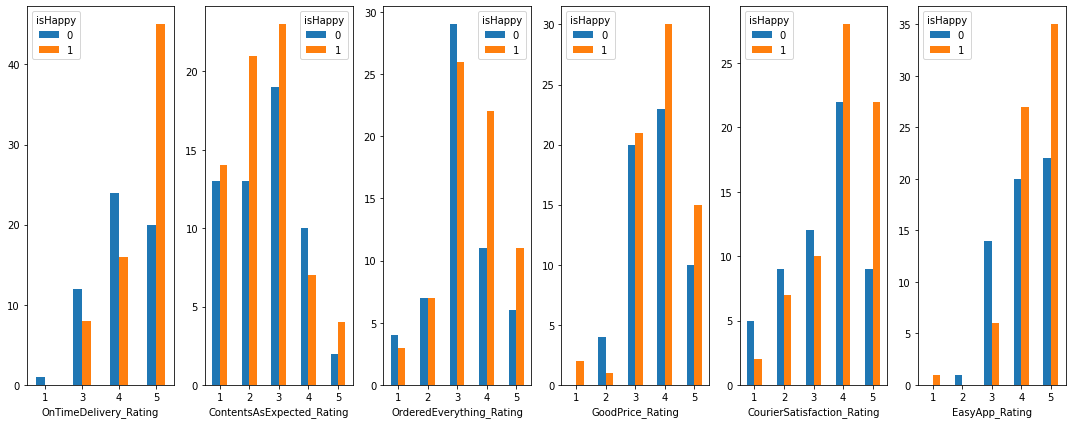

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(15,6))
custData.groupby(['isHappy','OnTimeDelivery_Rating']).size().unstack('isHappy').plot(kind='bar',ax=ax[0],rot=0)
custData.groupby(['isHappy','ContentsAsExpected_Rating']).size().unstack('isHappy').plot(kind='bar',ax=ax[1],rot=0)
custData.groupby(['isHappy','OrderedEverything_Rating']).size().unstack('isHappy').plot(kind='bar',ax=ax[2],rot=0)
custData.groupby(['isHappy','GoodPrice_Rating']).size().unstack('isHappy').plot(kind='bar',ax=ax[3],rot=0)
custData.groupby(['isHappy','CourierSatisfaction_Rating']).size().unstack('isHappy').plot(kind='bar',ax=ax[4],rot=0)
custData.groupby(['isHappy','EasyApp_Rating']).size().unstack('isHappy').plot(kind='bar',ax=ax[5],rot=0)
plt.tight_layout()

### C] From the heatmap below, we can identify how the variables are correlated. The dependent variable 'isHappy' has negative correlation with 'ContentsAsExpected_Rating'. And based on the values, it seems that it has more positive correlation with fields 'OnTimeDelivery_Rating' and 'CourierSatisfaction_Rating'.

### There is not any strong correlation between independent variables. But, 'ContentsAsExpected_Rating' has negative correlation with 'EasyApp_Rating'.

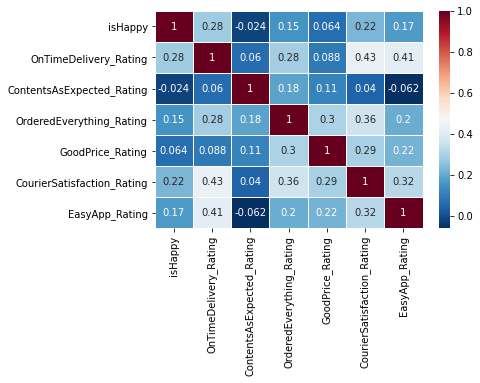

In [9]:
pearsoncorr = custData.corr(method='pearson')
_ = sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [10]:
dataset = custData.values
y = dataset[:,0]
X = dataset[:,1:]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

## Step 4: Feature Selection

Feature(0) OnTimeDelivery_Rating: 0.560653
Feature(1) ContentsAsExpected_Rating: 0.018557
Feature(2) OrderedEverything_Rating: 1.609246
Feature(3) GoodPrice_Rating: 0.312048
Feature(4) CourierSatisfaction_Rating: 2.130244
Feature(5) EasyApp_Rating: 0.265720


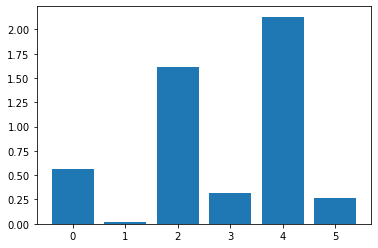

In [11]:
# feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# scores for features
feature_names = ['OnTimeDelivery_Rating','ContentsAsExpected_Rating','OrderedEverything_Rating',
           'GoodPrice_Rating','CourierSatisfaction_Rating','EasyApp_Rating']
for i in range(len(fs.scores_)):
    print('Feature(%d) %s: %f' % (i, feature_names[i], fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### From the graph plotted above and below, we can conclude that 'ContentAsExpected_Rating' has least score among all features. So, we can try using only 5 out of these 6 features to train our model.

Feature(0) OnTimeDelivery_Rating: 3.796648
Feature(1) ContentsAsExpected_Rating: 0.037783
Feature(2) OrderedEverything_Rating: 4.860837
Feature(3) GoodPrice_Rating: 1.756607
Feature(4) CourierSatisfaction_Rating: 6.257413
Feature(5) EasyApp_Rating: 1.973800


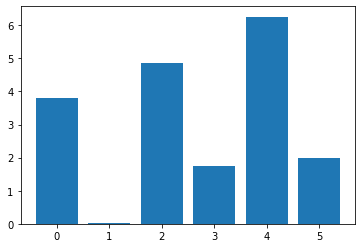

In [12]:
# feature selection
fsc = SelectKBest(score_func=f_classif, k='all')
fsc.fit(X_train, y_train)
X_train_fsc = fsc.transform(X_train)
X_test_fsc = fsc.transform(X_test)

# sscores for features
feature_names = ['OnTimeDelivery_Rating','ContentsAsExpected_Rating','OrderedEverything_Rating',
           'GoodPrice_Rating','CourierSatisfaction_Rating','EasyApp_Rating']
for i in range(len(fsc.scores_)):
    print('Feature(%d) %s: %f' % (i, feature_names[i], fsc.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fsc.scores_))], fsc.scores_)
plt.show()

## Step 5: Creating Model

### Before selecting specific features, lets first find out how different models behave using all the features. Here, we will also use Cross Validation 

In [25]:
def model_performance(Xlr,ylr):
    # Spot Check Algorithms
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('RF', RandomForestClassifier(max_depth=6, random_state=1)))
    ratio = float(np.sum(ylr == 0)) / np.sum(ylr==1)
    models.append(('XGB', XGBClassifier(scale_pos_weight = ratio, learning_rate =0.01,
                        objective= 'binary:logistic', use_label_encoder=False, eval_metric='error')))

    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, Xlr, ylr, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %.2f (%.2f)' % (name, cv_results.mean()*100, cv_results.std()))
    _ = plt.bar(names,np.mean(results, axis=1)*100)

### We can infer from below graph that the ensemble model Random Forest Classifier and Extreme Gradient Boosting (XGBoost) Classifier performs better than linear models and trees.

LR: 57.64 (0.18)
LDA: 54.31 (0.15)
KNN: 42.78 (0.20)
CART: 59.17 (0.12)
NB: 52.08 (0.13)
SVM: 53.06 (0.17)
RF: 61.11 (0.12)
XGB: 61.53 (0.12)


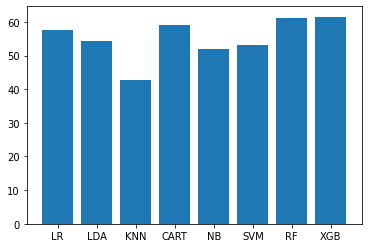

In [30]:
model_performance(X_train, y_train)

### Now by just considering required features, lets evaluate above models again. Based on the feature scores, lets set the value of k=3.

In [31]:
# feature selection
def select_features_chi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k=3)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [32]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# feature selection (chi2)
X_train_cfs, X_test_cfs, cfs = select_features_chi(X_train, y_train, X_test)

LR: 57.78 (0.16)
LDA: 58.75 (0.15)
KNN: 57.64 (0.13)
CART: 66.94 (0.11)
NB: 60.00 (0.13)
SVM: 56.67 (0.09)
RF: 69.17 (0.13)
XGB: 62.50 (0.11)


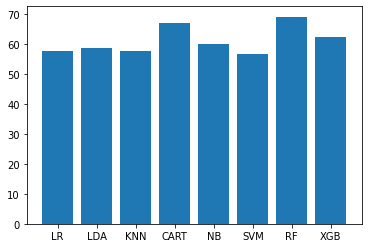

In [33]:
model_performance(X_train_cfs, y_train)

In [34]:
rfcModel = RandomForestClassifier(max_depth=6, random_state=1)
rfcModel.fit(X_train_cfs, y_train)
predictions = rfcModel.predict(X_test_cfs)

# Evaluate predictions
print('Testing Accuracy: %.2f \n' % (accuracy_score(y_test, predictions)*100))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:\n')
print(classification_report(y_test, predictions))

Testing Accuracy: 55.26 

Confusion matrix:
[[14  3]
 [14  7]]

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        17
           1       0.70      0.33      0.45        21

    accuracy                           0.55        38
   macro avg       0.60      0.58      0.54        38
weighted avg       0.61      0.55      0.53        38



In [35]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train==1)
xgbModel = XGBClassifier(scale_pos_weight = ratio, learning_rate =0.1,
                        objective= 'binary:logistic', use_label_encoder=False, eval_metric='error')
xgbModel.fit(X_train_cfs, y_train)
predictions = xgbModel.predict(X_test_cfs)

# Evaluate predictions
print('Testing Accuracy: %.2f \n' % (accuracy_score(y_test, predictions)*100))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:\n')
print(classification_report(y_test, predictions))

Testing Accuracy: 55.26 

Confusion matrix:
[[13  4]
 [13  8]]

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.76      0.60        17
           1       0.67      0.38      0.48        21

    accuracy                           0.55        38
   macro avg       0.58      0.57      0.54        38
weighted avg       0.59      0.55      0.54        38



In [36]:
decModel = DecisionTreeClassifier()
decModel.fit(X_train_cfs, y_train)
predictions = decModel.predict(X_test_cfs)

# Evaluate predictions
print('Testing Accuracy: %.2f \n' % (accuracy_score(y_test, predictions)*100))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:\n')
print(classification_report(y_test, predictions))

Testing Accuracy: 55.26 

Confusion matrix:
[[13  4]
 [13  8]]

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.76      0.60        17
           1       0.67      0.38      0.48        21

    accuracy                           0.55        38
   macro avg       0.58      0.57      0.54        38
weighted avg       0.59      0.55      0.54        38



## Conclusion:

### Even though the training accuracy of these two models i.e. RandomForestClassifier and XGBoostClassifier was more (69.17 and 62.50 respectively), the testing accuracy is reduced (both 55.26). This might be because the model is overfitting. Also, we can increase the training data by bagging and boosting the dataset.


### We can further improve the model performance by pipelining different model together to create customized ensemble model. 

### Based on our previous observation, we can conclude that since the score for feature 'X2 = contents of my order was as I expected' was too low, we can remove this question from next survey. And, seems like feature 'X5 = I am satisfied with my courier' has more importance in predicting a customer's happiness.